In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

In [3]:
data=pd.read_csv("IS.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-13,10.25,10.430,9.99,10.02,10.02,1930800
1,2021-07-14,10.02,10.050,8.66,8.72,8.72,2836700
2,2021-07-15,8.72,8.890,8.25,8.43,8.43,3247200
3,2021-07-16,8.55,8.600,8.08,8.27,8.27,2383600
4,2021-07-19,8.20,8.235,7.80,7.92,7.92,2572200


In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-13,10.25,10.430,9.99,10.020,10.020,1930800
1,2021-07-14,10.02,10.050,8.66,8.720,8.720,2836700
2,2021-07-15,8.72,8.890,8.25,8.430,8.430,3247200
3,2021-07-16,8.55,8.600,8.08,8.270,8.270,2383600
4,2021-07-19,8.20,8.235,7.80,7.920,7.920,2572200
...,...,...,...,...,...,...,...
248,2022-07-07,2.43,2.590,2.43,2.590,2.590,3539200
249,2022-07-08,2.52,2.550,2.43,2.490,2.490,2055100
250,2022-07-11,2.45,2.480,2.28,2.300,2.300,2301600
251,2022-07-12,2.30,2.350,2.22,2.230,2.230,2564000


In [6]:
df = data[['Date','Open']]

In [7]:
df


,Date,Open
0,2021-07-13,10.25
1,2021-07-14,10.02
2,2021-07-15,8.72
3,2021-07-16,8.55
4,2021-07-19,8.20
...,...,...
248,2022-07-07,2.43
249,2022-07-08,2.52
250,2022-07-11,2.45
251,2022-07-12,2.30


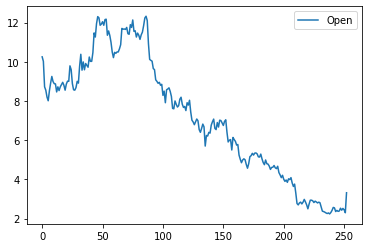

In [8]:
df.plot()
plt.show()

In [9]:
df.columns = ['ds','y']

In [10]:
df

,ds,y
0,2021-07-13,10.25
1,2021-07-14,10.02
2,2021-07-15,8.72
3,2021-07-16,8.55
4,2021-07-19,8.20
...,...,...
248,2022-07-07,2.43
249,2022-07-08,2.52
250,2022-07-11,2.45
251,2022-07-12,2.30


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      253 non-null    object 
 1   y       253 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [12]:
df['ds'] = pd.to_datetime(df['ds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      253 non-null    datetime64[ns]
 1   y       253 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB


In [14]:
df

,ds,y
0,2021-07-13,10.25
1,2021-07-14,10.02
2,2021-07-15,8.72
3,2021-07-16,8.55
4,2021-07-19,8.20
...,...,...
248,2022-07-07,2.43
249,2022-07-08,2.52
250,2022-07-11,2.45
251,2022-07-12,2.30


In [15]:
from fbprophet import Prophet

In [16]:
# Initialize the Model
model = Prophet() 

In [17]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [19]:
# Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [20]:
future_dates


,ds
0,2021-07-13
1,2021-07-14
2,2021-07-15
3,2021-07-16
4,2021-07-19
...,...
613,2023-07-09
614,2023-07-10
615,2023-07-11
616,2023-07-12


In [21]:
prediction=model.predict(future_dates)

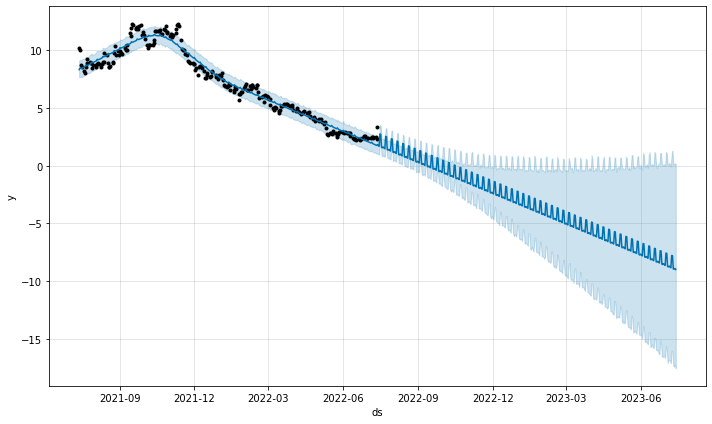

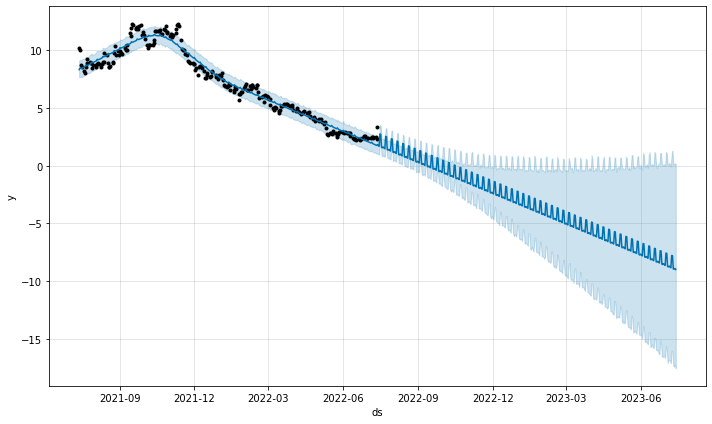

In [22]:
### plot the predicted projection
model.plot(prediction)